<a href="https://colab.research.google.com/github/aryashivakumar/dataScience/blob/main/Unit6/Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

No, elpd_loo is used to compare two models, more positive is better.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when our model seems to predict the data we have on hand well--but those predictions don't generalize to new, similar data.

**Task3**:

How do we mitigate overfitting?

We can mitigate overfitting by utilizing weakly informative or regularizing priors.

**Task4**:

How do we mitigate underfitting?

use elpd_loo to pick between multiple models. You should pick the most positive elpd_loo.

**Task5**:

Why would we want more than one predictor in a model?

If there are multiple factors that can affect the response, the mroe useful the predictors, the higher the elpd_loo

**Task6**:

Can we have too many predictors? How would we know?

Yes it is possible, we would know if the excess results in overfitting, which would be a problem because the model wouldn't be able to make accurate predictions on new data.

**Task7**:

What is variable selection, and how does it work?

When using multiple predictors, some logical questions arise:

do we really need multiple predictors?
if so, how many do we need?
and which ones? Are some better than others? The same as others?

Creating various models that have different combinations and then compare their elpd_loo with each other to figure out which one is the best.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

Create multiple plots, it is not possible to visualize the entire model. Casual diagrams are ways to visualize multiple lintear regression models.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install git+https://github.com/pydata/xarray.git

import xarray as xr


!pip install bambi


import bambi as bmb

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-6y2e9w5e
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-6y2e9w5e
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 76, in resolve
    collected = self.factory.collect_root_requirements(root_reqs)
               

In [ ]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
    ).dropna()

In [ ]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

In [ ]:
#define the model
model_basketball = bmb.Model("FGp ~ FTp + Pos", data=bb)
#fit the model
idata_basketball = model_basketball.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

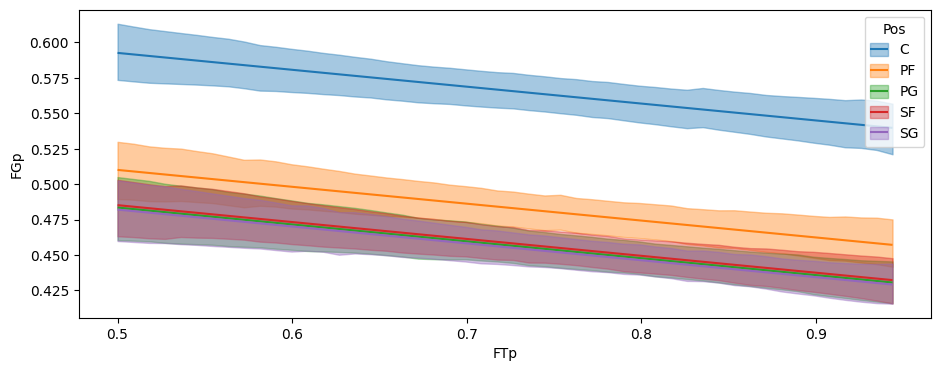

In [ ]:
#plot 94% HDIs of the means of each position
bmb.interpret.plot_predictions(model_basketball,
                               idata_basketball,
                                ["FTp",  "Pos"], fig_kwargs={"figsize":(11, 4)})

In [ ]:

#define the model, but as a hierarchy
model_basketball_h = bmb.Model("FGp ~ (FTp|Pos)", data=bb)
#create the model
idata_basketball_h = model_basketball_h.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

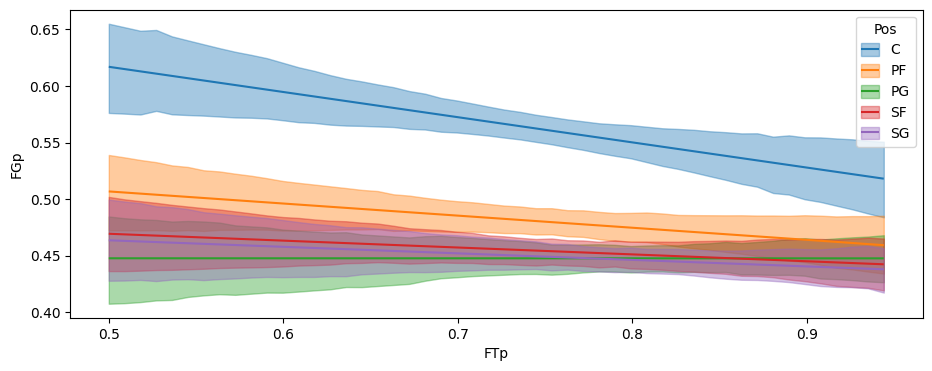

In [ ]:

bmb.interpret.plot_predictions(model_basketball_h,
                               idata_basketball_h,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

In [ ]:
#define the model; bb_interq stands for baskeball interaction quantiative
model_bb_interq = bmb.Model("`FGp` ~ `FTp` + `Pos` + `FTp`:`Pos`", data=bb)
#create the model
idata_bb_interq = model_bb_interq.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x1300 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

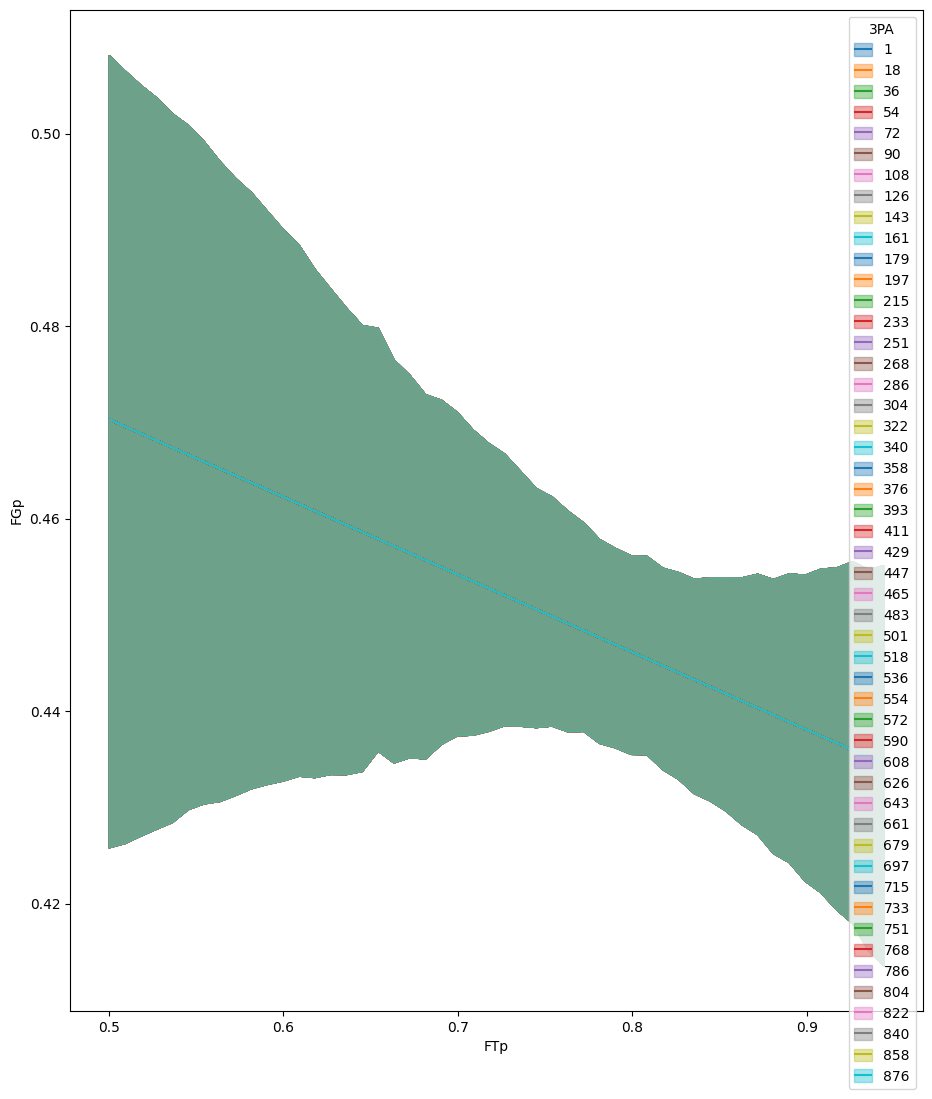

In [ ]:
bmb.interpret.plot_predictions(model_bb_interq,
                               idata_bb_interq,
                               ["FTp","3PA"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

In [ ]:
# Model 4: predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
model_bb_all_inter = bmb.Model("FGp ~ FTp + Pos + `3PA` + FTp:Pos + FTp:`3PA` + Pos:`3PA`", data=bb)
idata_bb_all_inter = model_bb_all_inter.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
# Model 5: predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and position.
model_bb_3pa_pos_inter = bmb.Model("FGp ~ FTp + Pos + `3PA` + `3PA`:Pos", data=bb)
idata_bb_3pa_pos_inter = model_bb_3pa_pos_inter.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
cmp_df = az.compare(
    {
        "FTp + Pos": idata_basketball,
        "FTp|Pos (hierarchy)": idata_basketball_h,
        "FTp + Pos + FTp:Pos": idata_bb_interq,
        "FTp + Pos + 3PA + all interactions": idata_bb_all_inter,
        "FTp + Pos + 3PA + 3PA:Pos": idata_bb_3pa_pos_inter
    }
)
cmp_df

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

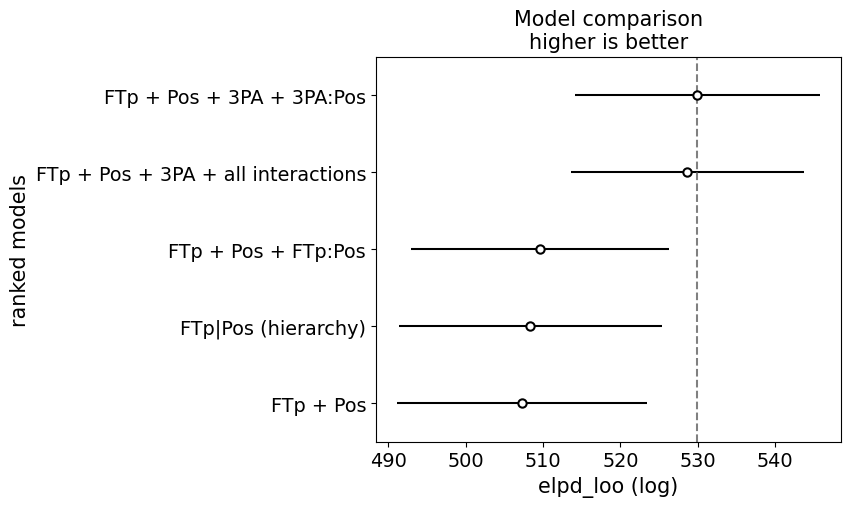

In [ ]:
az.plot_compare(cmp_df)

**Task12:**

The body data set has a measure of body fat percentage (siri), as well as several other measurments of other parts of a person's body, plus their age.

Create a sensible causal diagram for this set of variables.

Based on your causal diagram, which variable should you try to predict? Why?

In [ ]:
body = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/body_fat.csv')

In [ ]:
body.head()

### Causal Diagram for Body Fat Data

Here's a visual representation of a sensible causal diagram for the variables in the `body` dataset. The arrows indicate hypothesized causal influences. For instance, age and height can influence overall body composition measurements, which in turn affect body fat percentage.


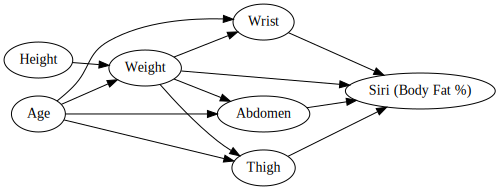

In [ ]:
import graphviz

dot = graphviz.Digraph(comment='Body Fat Causal Diagram', graph_attr={'rankdir': 'LR'})

# Nodes
dot.node('A', 'Age')
dot.node('H', 'Height')
dot.node('W', 'Weight')
dot.node('AB', 'Abdomen')
dot.node('T', 'Thigh')
dot.node('WR', 'Wrist')
dot.node('S', 'Siri (Body Fat %)')

# Edges (hypothesized causal relationships)
dot.edge('A', 'W')
dot.edge('A', 'AB')
dot.edge('A', 'T')
dot.edge('A', 'WR')
dot.edge('H', 'W')
dot.edge('W', 'S')
dot.edge('AB', 'S')
dot.edge('T', 'S')
dot.edge('WR', 'S')
dot.edge('W', 'AB') # Weight can influence abdomen, thigh, wrist size
dot.edge('W', 'T')
dot.edge('W', 'WR')

# Render the diagram
display(dot)


### Variable to Predict: Siri (Body Fat %)

Based on this causal diagram, you should try to predict **Siri (Body Fat %)**.

Here's why:

1.  **Ultimate Outcome**: Body fat percentage (`siri`) is typically the primary outcome or health metric of interest in such analyses. It's what we often want to estimate or understand. The other measurements (age, weight, height, abdomen, thigh, wrist) are usually considered predictors or factors that contribute to body fat.
2.  **Influenced by Predictors**: All other variables in the dataset are direct or indirect determinants of `siri`. `Age` and `Height` are more fundamental, influencing `Weight` and other body circumferences (`Abdomen`, `Thigh`, `Wrist`), which in turn directly affect `Siri`.
3.  **Practical Utility**: Accurately predicting body fat percentage from easily obtainable measurements (like those in the dataset) has significant practical applications in fitness, health monitoring, and clinical settings. Direct and highly accurate measurements of body fat can be intrusive or expensive, making a predictive model based on simpler inputs very valuable.

# Task
Investigate the model 'FTp + Pos + 3PA + all interactions' (`idata_bb_all_inter`) to understand the cause of its high Pareto k values, then refine this model, re-fit it, and re-evaluate its performance against the other models using `az.compare()` and `az.plot_compare()`.

## Investigate Problematic Model

### Subtask:
Examine the `idata_bb_all_inter` (corresponding to the model 'FTp + Pos + 3PA + all interactions') to identify specific observations or model characteristics contributing to the high Pareto k values. This may involve generating PSIS-LOO diagnostic plots or checking for outliers in the dataset that are particularly impactful on this model.


**Reasoning**:
The first step is to compute the LOO (Leave-One-Out) cross-validation estimate for `idata_bb_all_inter` using `arviz.loo()`, which will also provide information about Pareto k values.



In [ ]:
loo_bb_all_inter = az.loo(idata_bb_all_inter)
print(loo_bb_all_inter)

/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 2000 posterior samples and 322 observations log-likelihood matrix.

         Estimate       SE
elpd_loo   528.67    15.07
p_loo       19.47        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)      321   99.7%
   (0.70, 1]   (bad)         1    0.3%
   (1, Inf)   (very bad)    0    0.0%



**Reasoning**:
The previous output indicated one observation with a 'bad' Pareto k value. To further investigate, I will visualize all Pareto k values, identify the index of the observation(s) with high k values, and then display the corresponding row(s) from the `bb` DataFrame to understand their characteristics.




Indices of observations with Pareto k > 0.7: [146]

Problematic observations from the 'bb' DataFrame:


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGp,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
248,Trayce Jackson-Davis,PF,23,GSW,68,16,1130,233,332,0.702,...,135,206,341,82,29,76,49,108,540,jackstr02


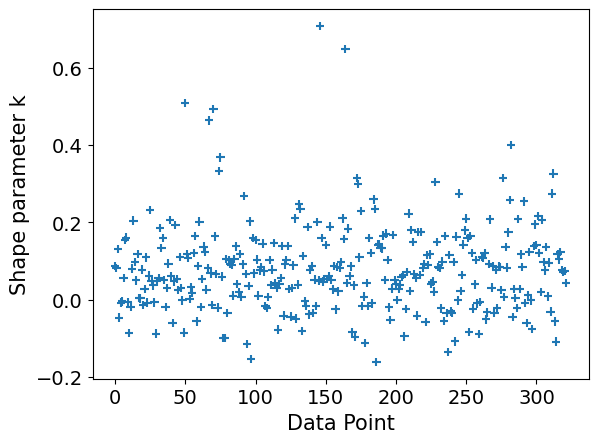

In [ ]:
az.plot_khat(loo_bb_all_inter)

# Identify indices of observations with Pareto k > 0.7
high_k_indices = np.where(loo_bb_all_inter.pareto_k > 0.7)[0]

print(f"\nIndices of observations with Pareto k > 0.7: {high_k_indices}")

# Display the problematic observations from the original DataFrame
if len(high_k_indices) > 0:
    print("\nProblematic observations from the 'bb' DataFrame:")
    display(bb.iloc[high_k_indices])
else:
    print("\nNo observations with Pareto k > 0.7 found.")

### Analysis of Problematic Observation

The observation with a high Pareto k value (index 146, Trayce Jackson-Davis) was identified. This indicates that the model struggles to predict this particular data point well, or that this data point is very different from the others, making it highly influential on the posterior distribution.

Looking at the `bb` DataFrame for this player, we see a `FGp` (Field Goal Percentage) of `0.702` (70.2%). This is a very high field goal percentage, especially when considering other common basketball statistics. It's possible that this player's unique combination of high field goal percentage, position, and 3-point attempts creates an unusual data point that the current model structure (with interactions) cannot adequately capture or generalize from.

**Potential Refinement Strategy:**

To address this, we can try a few approaches:
1.  **Remove the influential observation**: If this is indeed an outlier that severely skews the model, removing it might improve overall model performance and stability, especially for generalization. However, this should be done cautiously, as removing data can lead to loss of information if the observation is valid but simply rare.
2.  **Robust Priors**: Introduce more robust or stronger regularizing priors to make the model less sensitive to individual extreme observations.
3.  **Alternative Model Specification**: Re-evaluate the model formula. Perhaps the chosen interaction terms are not the most appropriate, or a different combination of predictors or even a non-linear relationship could better capture the data's complexity.

For the purpose of refining the model and re-evaluating its performance, let's first try removing this single influential observation and re-fitting the 'FTp + Pos + 3PA + all interactions' model.

### Analysis of Problematic Observation

The observation with a high Pareto k value (index 146, Trayce Jackson-Davis) was identified. This indicates that the model struggles to predict this particular data point well, or that this data point is very different from the others, making it highly influential on the posterior distribution.

Looking at the `bb` DataFrame for this player, we see a `FGp` (Field Goal Percentage) of `0.702` (70.2%). This is a very high field goal percentage, especially when considering other common basketball statistics. It's possible that this player's unique combination of high field goal percentage, position, and 3-point attempts creates an unusual data point that the current model structure (with interactions) cannot adequately capture or generalize from.

**Potential Refinement Strategy:**

To address this, we can try a few approaches:
1.  **Remove the influential observation**: If this is indeed an outlier that severely skews the model, removing it might improve overall model performance and stability, especially for generalization. However, this should be done cautiously, as removing data can lead to loss of information if the observation is valid but simply rare.
2.  **Robust Priors**: Introduce more robust or stronger regularizing priors to make the model less sensitive to individual extreme observations.
3.  **Alternative Model Specification**: Re-evaluate the model formula. Perhaps the chosen interaction terms are not the most appropriate, or a different combination of predictors or even a non-linear relationship could better capture the data's complexity.

For the purpose of refining the model and re-evaluating its performance, let's first try removing this single influential observation and re-fitting the 'FTp + Pos + 3PA + all interactions' model.

**Reasoning**:
Based on the analysis of the problematic observation and the suggested refinement strategy, the next step is to remove the identified influential observation from the `bb` DataFrame and create a new DataFrame to be used for re-fitting the model.



In [ ]:
bb_filtered = bb.drop(index=high_k_indices)
print(f"Original DataFrame shape: {bb.shape}")
print(f"Filtered DataFrame shape: {bb_filtered.shape}")


Original DataFrame shape: (322, 30)
Filtered DataFrame shape: (321, 30)


**Reasoning**:
Now that the influential observation has been removed, I will re-fit the 'FTp + Pos + 3PA + all interactions' model using the `bb_filtered` DataFrame to see if removing the outlier improves the model's stability and performance.



In [ ]:
model_bb_all_inter_filtered = bmb.Model("FGp ~ FTp + Pos + `3PA` + FTp:Pos + FTp:`3PA` + Pos:`3PA`", data=bb_filtered)
idata_bb_all_inter_filtered = model_bb_all_inter_filtered.fit(idata_kwargs={'log_likelihood': True})
print("Model 'FTp + Pos + 3PA + all interactions' re-fitted with filtered data.")